In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import multivariate_normal as mvn




In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
print("First 5 Rows:")
print(df.head())

First 5 Rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  

In [5]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
print(" Target Variable Distribution:")
print(df['Exited'].value_counts(normalize=True))  

 Target Variable Distribution:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [7]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min  

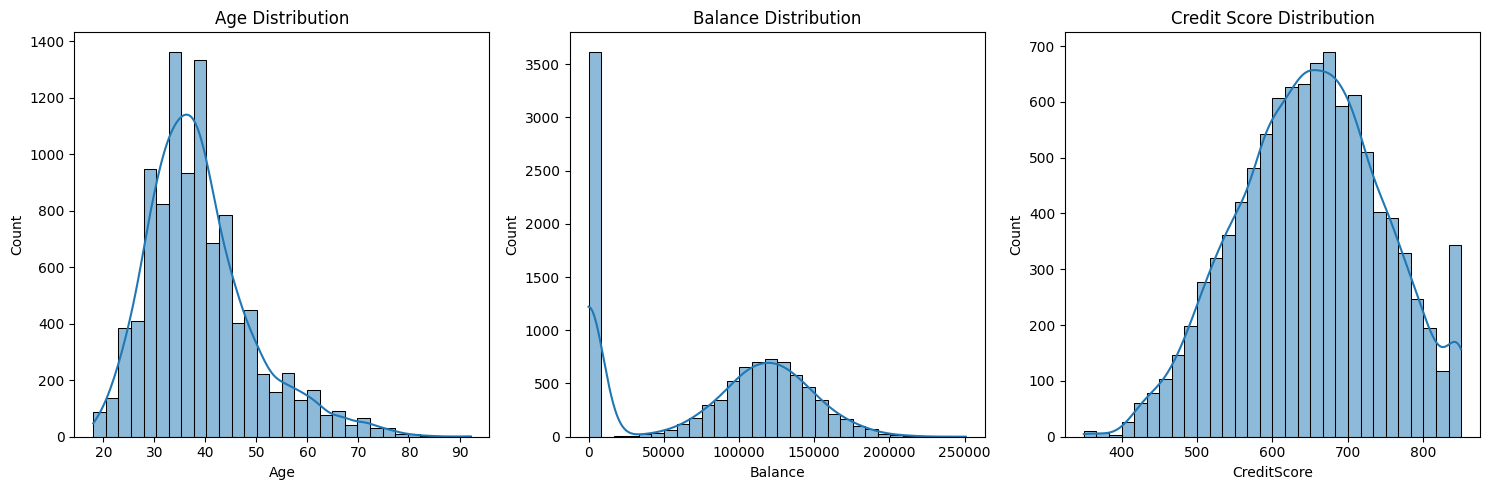

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Balance'], bins=30, kde=True)
plt.title('Balance Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title('Credit Score Distribution')

plt.tight_layout()
plt.show()

In [9]:
df['HasBalance'] = (df['Balance'] > 0).astype(int)
print(df['HasBalance'].value_counts(normalize=True))

HasBalance
1    0.6383
0    0.3617
Name: proportion, dtype: float64


In [10]:
df.groupby('HasBalance')['Exited'].mean()

HasBalance
0    0.138236
1    0.240796
Name: Exited, dtype: float64

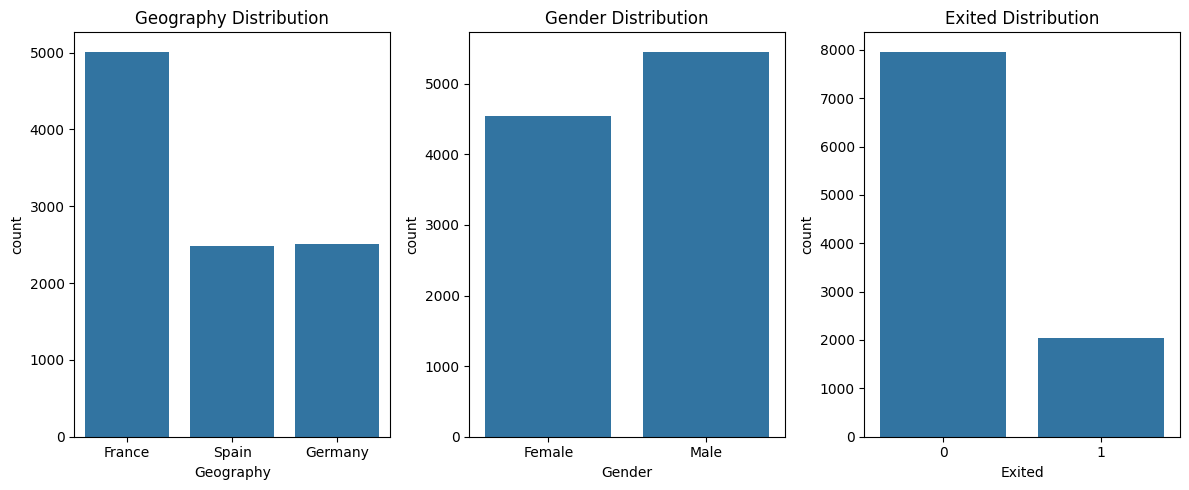

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Geography', data=df)
plt.title('Geography Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='Exited', data=df)
plt.title('Exited Distribution')

plt.tight_layout()
plt.show()

In [12]:
categorical_cols = ['Geography', 'Gender']
for col in categorical_cols:
    print(f"\n Unique values in '{col}': {df[col].unique()}")

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


 Unique values in 'Geography': ['France' 'Spain' 'Germany']

 Unique values in 'Gender': ['Female' 'Male']


In [13]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})


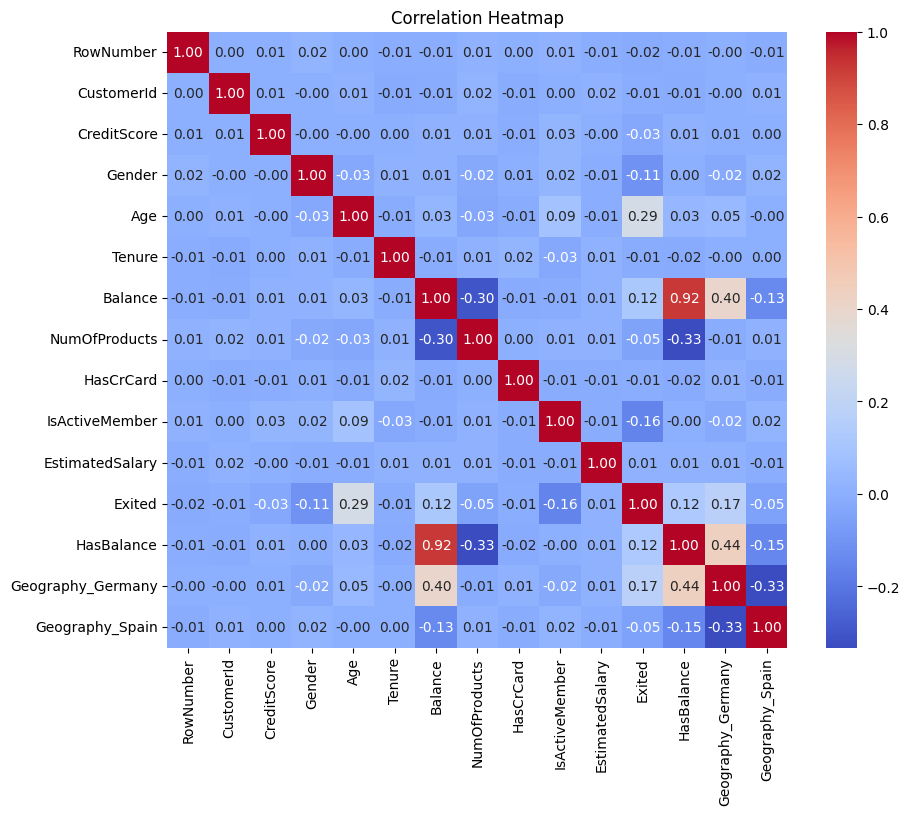

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [15]:
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [16]:
print("\nPreprocessed Data Sample:")
print(df_clean.head())

print("\nFinal Columns:")
print(df_clean.columns)


Preprocessed Data Sample:
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  HasBalance  Geography_Germany  \
0               1        101348.88       1           0              False   
1               1        112542.58       0           1              False   
2               0        113931.57       1           1              False   
3               0         93826.63       0           0              False   
4               1         79084.10       0           1              False   

   Geography_Spain  
0            False  
1          

In [17]:
def sigmoid(h):
    return 1/(1+np.exp(-h))
def cross_entropy(y, p_hat):
    epsilon = 1e-10  
    p_hat = np.clip(p_hat, epsilon, 1 - epsilon)
    return -(1/len(y)) * np.sum(y*np.log(p_hat) + (1 - y)*np.log(1 - p_hat))
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [18]:
class logisticRegression():
    def __init__(self, thresh=0.5, seed=None):
        self.W = None
        self.b = None
        self.thresh = thresh
        if seed is not None:
            np.random.seed(seed)
        
    def fit(self, X, y, eta=1e-3, epochs=1000, show_curve=True):
        epochs = int(epochs)
        N, D = X.shape

        self.W = np.random.randn(D) * 0.01
        self.b = float(np.random.randn() * 0.01)

        J = np.zeros(epochs)

        for epoch in range(epochs):
            p_hat = self.__forward__(X)
            J[epoch] = cross_entropy(y, p_hat)
            self.W -= eta * (1/N) * X.T @ (p_hat - y)
            self.b -= eta * (1/N) * np.sum(p_hat - y)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("Epochs")
            plt.ylabel("Loss (Cross Entropy)")
            plt.title("Training Loss Curve")
            plt.show()

    def __forward__(self, X):
        return sigmoid(X @ self.W + self.b)
        
    def predict(self, X):
        return (self.__forward__(X) >= self.thresh).astype(np.int32)

In [19]:
def main():
    features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 
            'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
            'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'HasBalance']

    X = df[features].values
    y = df['Exited'].values

    X = np.array(X, dtype=float)
    y = np.array(y, dtype=int)

    numeric_cols = [0, 2, 3, 4, 5, 8]  

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train[:, numeric_cols] = scaler.fit_transform(X_train[:, numeric_cols])
    X_test[:, numeric_cols] = scaler.transform(X_test[:, numeric_cols])

    log_reg = logisticRegression(seed=42)
    log_reg.fit(X_train, y_train, eta=1e-2, epochs=30000)

    y_hat_train = log_reg.predict(X_train)
    y_hat_test = log_reg.predict(X_test)

    print(f"Training Accuracy: {accuracy(y_train, y_hat_train):.4f}")
    print(f"Test Accuracy: {accuracy(y_test, y_hat_test):.4f}")

    print("\nConfusion Matrix (Test):")
    print(confusion_matrix(y_test, y_hat_test))

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_hat_test, digits=4))


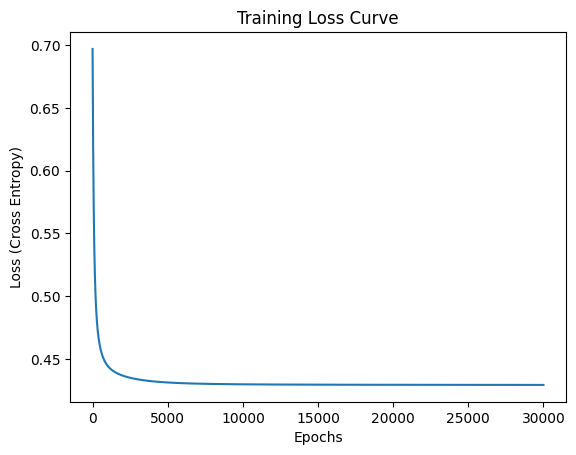

Training Accuracy: 0.8109
Test Accuracy: 0.8090

Confusion Matrix (Test):
[[1540   53]
 [ 329   78]]

Classification Report (Test):
              precision    recall  f1-score   support

           0     0.8240    0.9667    0.8897      1593
           1     0.5954    0.1916    0.2900       407

    accuracy                         0.8090      2000
   macro avg     0.7097    0.5792    0.5898      2000
weighted avg     0.7775    0.8090    0.7676      2000



In [20]:
if __name__ == "__main__":
    main()

In [21]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
            'NumOfProducts', 'HasCrCard', 'IsActiveMember',
            'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'HasBalance']

X = df_clean[features].values
y = df_clean['Exited'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [23]:
numeric_cols = [0, 2, 3, 4, 5, 8]  

scaler = StandardScaler()
X_train[:, numeric_cols] = scaler.fit_transform(X_train[:, numeric_cols])
X_test[:, numeric_cols] = scaler.transform(X_test[:, numeric_cols])

In [24]:
class gaussBayes():

    def fit(self, X, y, epsilon=1e-3):
        self.params = {}
        self.priors = {}

        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y==k,:]
            N_k, d = X_k.shape
            mu_k = X_k.mean(axis=0)
            cov_k = (1/(N_k-1)) * np.matmul((X_k-mu_k).T, (X_k-mu_k))+epsilon*np.identity(d)

            self.params[k] = {'mean':mu_k, 'cov':cov_k}
            self.priors[k] = len(X_k)/len(X)

    def predict(self, X):
        N, d = X.shape
        P_hat = np.zeros((N, len(self.K)))

        for k, l in self.params.items():
            P_hat[:,k] = mvn.logpdf(X, l['mean'], l['cov']) + np.log(self.priors[k])

        return P_hat.argmax(axis=1)
  
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [25]:
gaussNB = gaussBayes()

In [26]:
gaussNB.fit(X_train, y_train, epsilon=0.05)

In [27]:
y_pred = gaussNB.predict(X_test)

In [28]:
def confusionMatrix(y,y_hat):
    plt.figure(figsize=(10,7))
    y_actu = pd.Series(y, name='Actual')
    y_pred = pd.Series(y_hat, name='Predicted')
    cm = pd.crosstab(y_actu, y_pred)
    ax = sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.8335
Confusion Matrix:
[[1546   47]
 [ 286  121]]
None

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.72      0.30      0.42       407

    accuracy                           0.83      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.82      0.83      0.80      2000



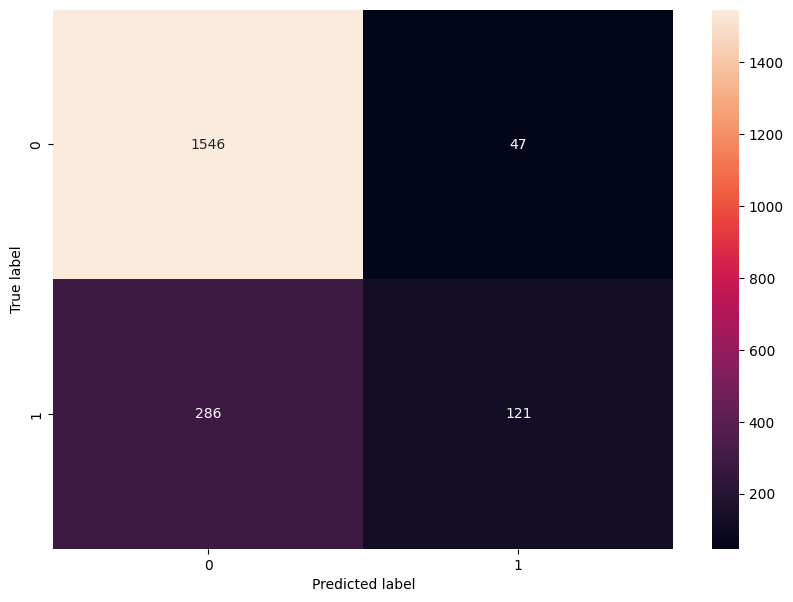

In [29]:
print(f"Accuracy: {accuracy(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(confusionMatrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
def linear(H):
    return H

def Sigmoid(H):
    return 1/(1+np.exp(-H))

def ReLU(H):
    return H*(H>0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis=1, keepdims=True)

In [32]:
def one_hot_encode(y):
    N=len(y)
    K=len(set(y))
    Y = np.zeros((N,K))
    for i in range(N):
        Y[i,y[i]]=1
    return Y

def cross_entropy(Y,P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [33]:
one_hot_encode(y_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], shape=(2000, 2))

In [34]:
class Shallow_ANN():
    def fit(self,X,y,neurons=6,eta=1e-3,epochs=1e3,show_curve=True):
        epochs =int(epochs)
        N,D=X.shape
        Y=one_hot_encode(y)
        K=Y.shape[1]

        #Initialize Weights and Biases
        self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}
        self.B={l:np.random.randn(M) for l, M in enumerate([neurons,K],1)}

        #Define Activations
        self.a = {1:np.tanh,2:softmax}

        #Loss Container
        J=np.zeros(epochs)
        #Gradient Descent Progression
        for epoch in range(epochs):
            self.__forward__(X)
            J[epoch]=cross_entropy(Y,self.Z[2])
            #Weight Update Rules For Layer 2
            self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
            self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
            # Weight Update Rules for Layer 1
            self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
            self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel(r"$\mathcal{J}$")
            plt.title("Training Curve")

    def __forward__(self, X):
        self.Z = {0: X}
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

    def predict(self,X):
        self.__forward__(X)
        return self.Z[2].argmax(axis=1)
    

In [35]:
def main_ann(X_train, y_train, X_test, y_test):
    
    X_train = X_train.astype(float)
    X_test = X_test.astype(float)
    my_ann = Shallow_ANN()
    my_ann.fit(X_train, y_train, neurons=10, eta=1e-3, epochs=1000, show_curve=True)

    y_hat_train = my_ann.predict(X_train)
    y_hat_test = my_ann.predict(X_test)

    print("Training Accuracy:", accuracy(y_train, y_hat_train))
    print("Test Accuracy:", accuracy(y_test, y_hat_test))

    plt.figure()
    plt.title("Predicted Class Distribution (Train Set)")
    plt.hist(y_hat_train, bins=np.arange(3)-0.5, rwidth=0.8)
    plt.xticks([0, 1])
    plt.xlabel("Predicted Class")
    plt.ylabel("Frequency")
    plt.show()

    from sklearn.metrics import confusion_matrix, classification_report
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_hat_test))
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_hat_test, digits=4))



Training Accuracy: 0.671375
Test Accuracy: 0.6715


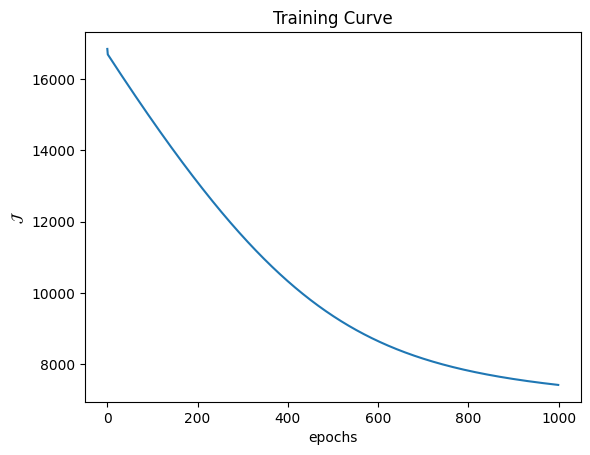

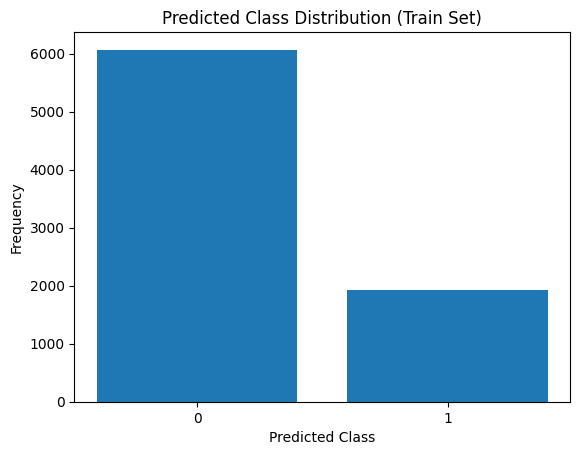

Confusion Matrix (Test):
[[1224  369]
 [ 288  119]]

Classification Report (Test):
              precision    recall  f1-score   support

           0     0.8095    0.7684    0.7884      1593
           1     0.2439    0.2924    0.2659       407

    accuracy                         0.6715      2000
   macro avg     0.5267    0.5304    0.5272      2000
weighted avg     0.6944    0.6715    0.6821      2000



In [36]:
if __name__ =="__main__":
    main_ann(X_train, y_train, X_test, y_test)